# 工作流程
1. 數據清洗與格式轉換
2. 探索性數據分析
3. 特徵工程
4. 建立基礎模型，嘗試多種算法
5. 模型條參
6. 評估與測試
7. 解釋模型

In [1]:
import pandas as pd
import numpy as np

# 不顯示設置值警告
pd.options.mode.chained_assignment = None

# 最多顯示60列數據
pd.set_option('display.max_columns',60)

# Matplotlib 圖形設置
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# ipython 圖形設置
from IPython.core.pylabtools import figsize

# Seaborn 圖形設置
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# 數據清洗

In [2]:
data = pd.read_csv('C:/Users/Administrator/Desktop/dunqian/train.csv')

data.head()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,8773,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3.0,11.0,3.0,7.0,2.0,0,0
1,6709,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1.0,10.0,0.0,8.0,2.0,0,0
2,1463,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1.0,10.0,0.0,14.0,2.0,0,0
3,4095,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5.0,10.0,0.0,7.0,2.0,0,0
4,3346,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1.0,1.0,0.0,7.0,2.0,0,0


# 數據類型與缺失值

In [3]:
# 查看數據類型及缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 19 columns):
ID                         8100 non-null int64
Administrative             8100 non-null int64
Administrative_Duration    8100 non-null float64
Informational              8100 non-null int64
Informational_Duration     8100 non-null float64
ProductRelated             8100 non-null int64
ProductRelated_Duration    8099 non-null float64
BounceRates                8100 non-null float64
ExitRates                  8100 non-null float64
PageValues                 8100 non-null float64
SpecialDay                 8100 non-null float64
Month                      8100 non-null int64
OperatingSystems           8099 non-null float64
Browser                    8099 non-null float64
Region                     8099 non-null float64
TrafficType                8099 non-null float64
VisitorType                8099 non-null float64
Weekend                    8100 non-null int64
Revenue                

In [4]:
# 尋找空值
data[data.isnull().T.any()]

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4316,7,6,999.000000,0,0.0,14,211.470238,0.001190,0.039521,0.0,0.0,8,NaN,10.0,1.0,5.0,2.0,0,0
5378,1,1,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.6,2,3.0,NaN,NaN,NaN,NaN,0,0
7838,5,7,245.333333,0,0.0,5,NaN,0.027273,0.051818,0.0,0.0,2,3.0,3.0,6.0,12.0,2.0,0,0


In [5]:
#數量較少選擇刪除
data.drop(index=[4316,5378,7838],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8097 entries, 0 to 8099
Data columns (total 19 columns):
ID                         8097 non-null int64
Administrative             8097 non-null int64
Administrative_Duration    8097 non-null float64
Informational              8097 non-null int64
Informational_Duration     8097 non-null float64
ProductRelated             8097 non-null int64
ProductRelated_Duration    8097 non-null float64
BounceRates                8097 non-null float64
ExitRates                  8097 non-null float64
PageValues                 8097 non-null float64
SpecialDay                 8097 non-null float64
Month                      8097 non-null int64
OperatingSystems           8097 non-null float64
Browser                    8097 non-null float64
Region                     8097 non-null float64
TrafficType                8097 non-null float64
VisitorType                8097 non-null float64
Weekend                    8097 non-null int64
Revenue                

In [6]:
#類別型資料調整為str類型

num_col = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend','Revenue']
data[num_col] = data[num_col].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8097 entries, 0 to 8099
Data columns (total 19 columns):
ID                         8097 non-null int64
Administrative             8097 non-null int64
Administrative_Duration    8097 non-null float64
Informational              8097 non-null int64
Informational_Duration     8097 non-null float64
ProductRelated             8097 non-null int64
ProductRelated_Duration    8097 non-null float64
BounceRates                8097 non-null float64
ExitRates                  8097 non-null float64
PageValues                 8097 non-null float64
SpecialDay                 8097 non-null float64
Month                      8097 non-null object
OperatingSystems           8097 non-null object
Browser                    8097 non-null object
Region                     8097 non-null object
TrafficType                8097 non-null object
VisitorType                8097 non-null object
Weekend                    8097 non-null object
Revenue                   

In [7]:
# 顯示欄位統計訊息
data.describe()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,8097.000000,8097.000000,8097.000000,8097.000000,8097.000000,8097.000000,8.097000e+03,8097.000000,8097.000000,8097.000000,8097.000000
mean,4502.041250,2.309003,80.802419,0.498209,32.896484,31.796468,8.313599e+04,0.020324,0.042678,5.746534,0.060417
std,2600.317713,3.311535,179.822259,1.258284,135.234455,44.966699,6.359881e+06,0.131958,0.047920,17.943550,0.197753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-11.000000,0.000000,0.000000,0.000000
25%,2241.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.838333e+02,0.000000,0.014286,0.000000,0.000000
50%,4506.000000,1.000000,7.000000,0.000000,0.000000,18.000000,5.990000e+02,0.003200,0.025121,0.000000,0.000000
75%,6761.000000,4.000000,91.888889,0.000000,0.000000,38.000000,1.462450e+03,0.016923,0.050000,0.000000,0.000000
max,8999.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,5.634924e+08,0.200000,0.200000,287.953793,1.000000


# 變量繪圖

In [8]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(data.dtypes, data.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

11 Numeric Features : ['ID', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']



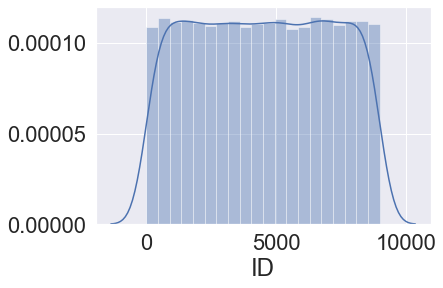

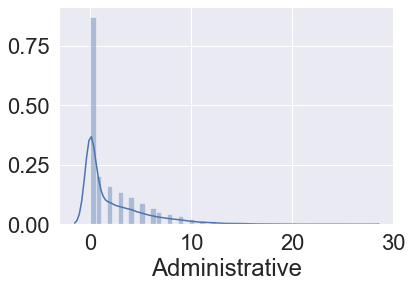

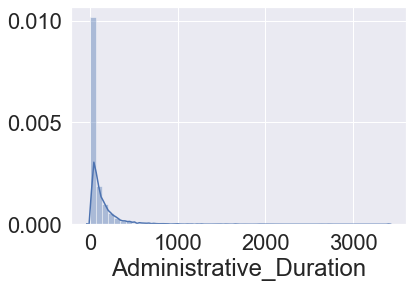

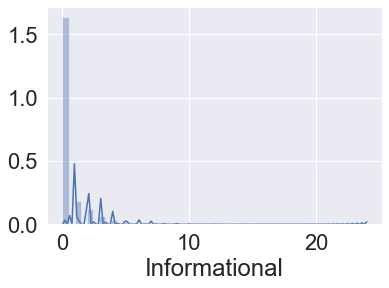

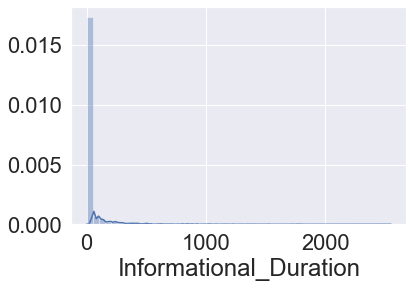

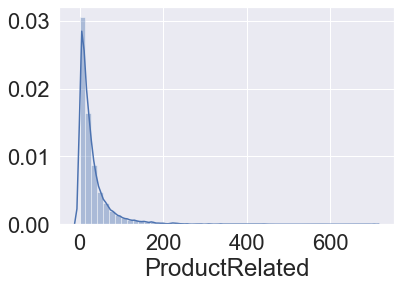

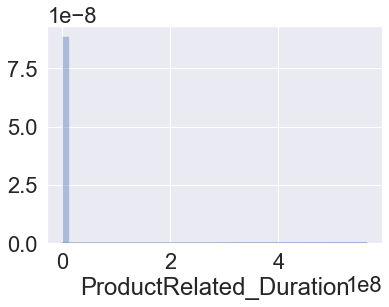

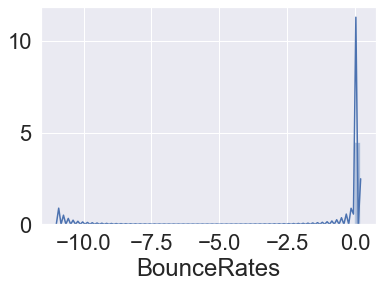

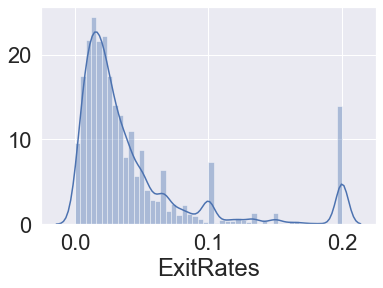

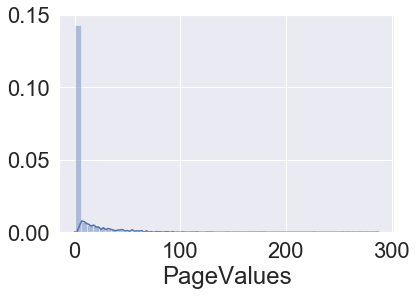

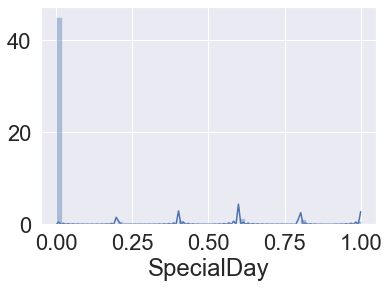

In [9]:
# 顯示欄位與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt

Y = data['Revenue']
num = Y.shape[0]
for i in num_features:
    sns.distplot(data[i][:num])
    plt.show()

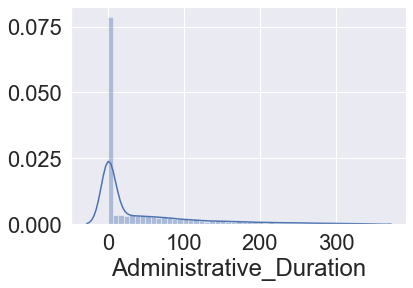

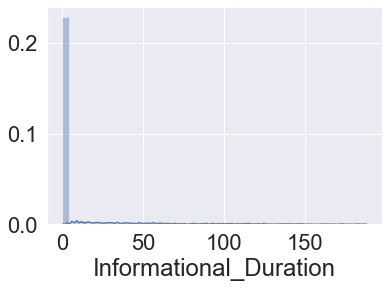

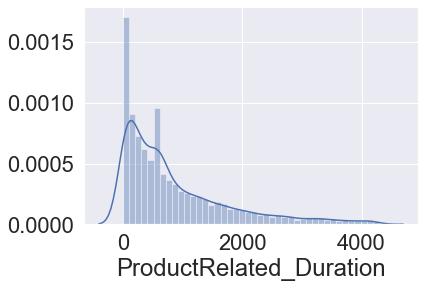

In [10]:
# 頁面瀏覽時間可能因為使用者僅開啟網頁未瀏覽，導致較長時間的極端值，選擇用50分位數取代
Duration = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']
for i in Duration:
    Q95 = np.percentile(data[i], 95)
    Q50 = np.percentile(data[i], 50)
    # 替換離群值至指定分位數
    if Q95 < data[i].max():
        data[i].loc[data[i] > Q95] = Q50
        
for i in Duration:
    sns.distplot(data[i][:num])
    plt.show()

# 觀察欄位與結果相關性

In [11]:
data['Revenue'] = data['Revenue'].astype('int64')
correlations = data.corr()['Revenue'].sort_values()
print('Most Positive Correlations:\n', abs(correlations).sort_values())

Most Positive Correlations:
 ID                         0.001620
Informational_Duration     0.049192
BounceRates                0.050021
SpecialDay                 0.076347
Informational              0.091240
Administrative_Duration    0.109591
ProductRelated_Duration    0.139462
Administrative             0.142896
ProductRelated             0.149102
ExitRates                  0.207755
PageValues                 0.499476
Revenue                    1.000000
Name: Revenue, dtype: float64


In [12]:
# 篩選數值欄位
ctg_col = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
num_col = ['ID', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
result = data['Revenue']
num_subset = data[num_col]

#創建平方根及對數欄位
for col in num_subset.columns:
    num_subset['sqrt_' + col] = np.sqrt(num_subset[col])
    num_subset['log_' + col] = np.log(num_subset[col])

#篩選類別型欄位
categorical_subset = data[ctg_col]
#One hot encoding
categorical_subset = pd.get_dummies(categorical_subset)
features = pd.concat([num_subset, categorical_subset, result],axis=1)

correlations = features.corr()['Revenue'].sort_values()
print('Most Positive Correlations:\n', abs(correlations).sort_values())


C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Most Positive Correlations:
 log_SpecialDay     0.000854
TrafficType_1.0    0.001199
ID                 0.001620
Region_8.0         0.001877
Browser_6.0        0.002686
                     ...   
log_BounceRates    0.257634
log_PageValues     0.326349
PageValues         0.499476
sqrt_PageValues    0.620765
Revenue            1.000000
Name: Revenue, Length: 101, dtype: float64


# 選擇數值特徵和類別特徵進行squt變換與One-hot encoding

In [13]:
features = data.copy()
num_subset = features[num_col]

for col in num_subset.columns:
    num_subset['sqrt_' + col] = np.sqrt(num_subset[col])
        
#篩選類別型欄位
#One hot encoding
features[ctg_col] = features[ctg_col].astype('str')
categorical_subset = pd.get_dummies(features[ctg_col])
print(categorical_subset)
features = pd.concat([num_subset, categorical_subset, result],axis=1)
features.head()

      Month_0  Month_1  Month_13  Month_2  Month_3  Month_4  Month_5  Month_6  \
0           0        0         0        1        0        0        0        0   
1           0        0         0        0        0        0        0        0   
2           0        0         0        0        0        0        0        0   
3           0        0         0        1        0        0        0        0   
4           0        0         0        1        0        0        0        0   
...       ...      ...       ...      ...      ...      ...      ...      ...   
8095        0        0         0        1        0        0        0        0   
8096        0        0         0        0        0        0        0        1   
8097        0        0         0        0        0        0        0        1   
8098        0        0         0        0        0        0        0        0   
8099        0        0         0        0        0        0        0        0   

      Month_7  Month_8  Mon

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,sqrt_ID,sqrt_Administrative,sqrt_Administrative_Duration,sqrt_Informational,sqrt_Informational_Duration,sqrt_ProductRelated,sqrt_ProductRelated_Duration,sqrt_BounceRates,sqrt_ExitRates,sqrt_PageValues,sqrt_SpecialDay,Month_0,Month_1,Month_13,Month_2,Month_3,Month_4,Month_5,Month_6,...,Region_6.0,Region_7.0,Region_8.0,TrafficType_0.0,TrafficType_1.0,TrafficType_10.0,TrafficType_11.0,TrafficType_12.0,TrafficType_13.0,TrafficType_14.0,TrafficType_15.0,TrafficType_16.0,TrafficType_17.0,TrafficType_18.0,TrafficType_19.0,TrafficType_2.0,TrafficType_3.0,TrafficType_4.0,TrafficType_5.0,TrafficType_6.0,TrafficType_7.0,TrafficType_8.0,TrafficType_9.0,VisitorType_0.0,VisitorType_1.0,VisitorType_2.0,Weekend_0,Weekend_1,Weekend_100,Revenue
0,8773,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,93.664294,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.447214,0.447214,0.00000,0.632456,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1,6709,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,81.908486,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.447214,0.447214,0.00000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,1463,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,38.249183,3.000000,17.349352,0.0,0.0,6.164414,51.201772,0.145643,0.210969,3.27432,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,4095,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,63.992187,1.414214,3.651484,0.0,0.0,10.246951,45.414134,0.110476,0.142394,0.00000,0.774597,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,3346,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,57.844619,0.000000,0.000000,0.0,0.0,4.358899,14.845365,0.102596,0.156978,0.00000,0.000000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


# 剔除共線特徵

In [14]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
    Inputs:
        thershold: any features with correlations greater than this value are removed
        
    Output:
        dataframe that contains only the non-highly-collinear features
    '''
    
    y = x['Revenue']
    x = x.drop(columns = ['Revenue'])
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns)-1)
    drop_cols = []
    
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            if val >= threshold:
                drop_cols.append(col.values[0])
    
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x['Revenue'] = y
    
    return x
    

In [15]:
features = remove_collinear_features(features, 0.6)
features_col = features.columns
features_col

Index(['ID', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_0',
       'Month_1', 'Month_13', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'OperatingSystems_0.0',
       'OperatingSystems_1.0', 'OperatingSystems_2.0', 'OperatingSystems_3.0',
       'OperatingSystems_4.0', 'OperatingSystems_5.0', 'OperatingSystems_6.0',
       'OperatingSystems_7.0', 'Browser_0.0', 'Browser_1.0', 'Browser_10.0',
       'Browser_11.0', 'Browser_2.0', 'Browser_4.0', 'Browser_6.0',
       'Browser_7.0', 'Browser_8.0', 'Browser_9.0', 'Region_0.0', 'Region_1.0',
       'Region_2.0', 'Region_3.0', 'Region_4.0', 'Region_5.0', 'Region_6.0',
       'Region_7.0', 'Region_8.0', 'TrafficType_0.0', 'TrafficType_1.0',
       'TrafficType_10.0', 'TrafficType_11.0', 'TrafficType_12.0',
       'TrafficType_13.0

# 數據集切分

In [16]:
train_x = features.drop(columns='Revenue')
train_y = features['Revenue']

x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=600)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5667, 74)
(2430, 74)
(5667,)
(2430,)


# 建立基礎模型(分群問題)
1. Logistic Regression
2. SVM
3. Random Forest

選擇默認參數篩選模型

In [17]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

def fit_and_evaluate(model):
    model.fit(x_train,y_train)
    model_pred = model.predict(x_test)
    model_mae = mae(y_test, model_pred)
    return model_mae

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_mae = fit_and_evaluate(lr)

print('Logistic Regression on the set: MAE = %0.4f'%lr_mae)

Logistic Regression on the set: MAE = 0.1099


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
from sklearn import svm
svm = svm.SVC(C=1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm)

print('SVM on the set: MAE = %0.4f'%svm_mae)

SVM on the set: MAE = 0.1490


In [20]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier(random_state=60)
Random_Forest_mae = fit_and_evaluate(Random_Forest)

print('Random_Forest on the set: MAE = %0.4f'%Random_Forest_mae)

Random_Forest on the set: MAE = 0.1177


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'Model Comparison on Test MAE')

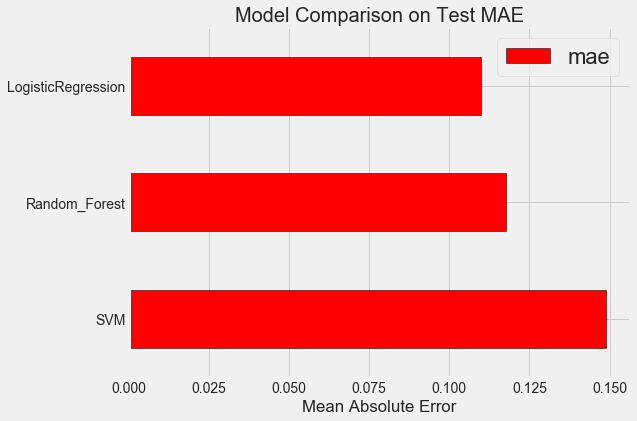

In [21]:
plt.style.use('fivethirtyeight')
figsize(8,6)

model_comparison = pd.DataFrame({'model':['LogisticRegression','SVM','Random_Forest'],
                                'mae':[lr_mae,svm_mae,Random_Forest_mae]})

model_comparison.sort_values('mae', ascending=False).plot(x='model', y='mae',kind='barh', color = 'red', edgecolor='black')
plt.ylabel('');plt.yticks(size=14);plt.xlabel('Mean Absolute Error');plt.xticks(size=14)
plt.title('Model Comparison on Test MAE',size=20)

# 調參

隨機搜索

In [22]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   44.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [23]:
random_results = pd.DataFrame(rf_random.cv_results_).sort_values('mean_test_score', ascending=False)
random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
45,1.271832,0.064775,0.069983,0.002390,230,5,1,sqrt,90,False,"{'n_estimators': 230, 'min_samples_split': 5, ...",0.908947,0.900476,0.898359,0.902594,0.004574,1
21,1.270178,0.024321,0.068986,0.003412,230,5,1,auto,70,False,"{'n_estimators': 230, 'min_samples_split': 5, ...",0.905241,0.906829,0.895712,0.902594,0.004909,1
57,0.936379,0.032981,0.054358,0.001776,180,5,1,sqrt,None,False,"{'n_estimators': 180, 'min_samples_split': 5, ...",0.907358,0.905241,0.894653,0.902418,0.005558,3
41,0.913113,0.005872,0.054189,0.002860,180,5,2,sqrt,50,False,"{'n_estimators': 180, 'min_samples_split': 5, ...",0.905770,0.906300,0.894124,0.902065,0.005619,4
28,1.150989,0.013406,0.070315,0.003077,230,10,1,sqrt,40,False,"{'n_estimators': 230, 'min_samples_split': 10,...",0.904711,0.904711,0.896241,0.901888,0.003993,5
52,0.959988,0.009392,0.054190,0.001881,180,5,1,auto,100,False,"{'n_estimators': 180, 'min_samples_split': 5, ...",0.905770,0.904711,0.894653,0.901712,0.005010,6
83,1.012848,0.036104,0.061836,0.007053,180,2,1,sqrt,40,False,"{'n_estimators': 180, 'min_samples_split': 2, ...",0.904711,0.901535,0.898359,0.901535,0.002593,7
82,0.939542,0.041360,0.051529,0.000941,180,10,1,sqrt,70,False,"{'n_estimators': 180, 'min_samples_split': 10,...",0.903123,0.904711,0.896771,0.901535,0.003431,7
79,0.633837,0.026996,0.039398,0.005291,130,2,4,sqrt,40,False,"{'n_estimators': 130, 'min_samples_split': 2, ...",0.906300,0.904711,0.892536,0.901182,0.006148,9
77,1.175254,0.030949,0.081787,0.004008,230,2,2,auto,90,False,"{'n_estimators': 230, 'min_samples_split': 2, ...",0.907888,0.901006,0.894653,0.901182,0.005404,9


In [24]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=70, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# 測試模型

In [46]:
defult_model = RandomForestClassifier(random_state =66)
final_model = rf_random.best_estimator_

final_model

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=70, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
%%timeit -n 1 -r 5
defult_model.fit(x_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


59.8 ms ± 1.95 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [48]:
%%timeit -n 1 -r 5
final_model.fit(x_train, y_train)

1.62 s ± 4.06 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [49]:
defult_pred = defult_model.predict(x_test)
final_pred = final_model.predict(x_test)

print('Defult model performance on the test set: MAE = %0.4f'% mae(y_test, defult_pred))
print('Final model performance on the test set: MAE = %0.4f'% mae(y_test, final_pred))

Defult model performance on the test set: MAE = 0.1132
Final model performance on the test set: MAE = 0.0996


# 模型預測

In [50]:
test_data = pd.read_csv('C:/Users/Administrator/Desktop/dunqian/test.csv')
test_data.head()                   

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,6162,0,0.0,0,0.0,12,482.500000,0.020000,0.040000,0.000000,0.0,8,3,10,0,5,2,0
1,8143,3,33.0,0,0.0,17,386.416667,0.000000,0.010000,0.000000,0.0,9,1,10,0,4,1,0
2,5571,0,0.0,0,0.0,9,154.800000,0.018182,0.030303,20.749351,0.0,8,3,3,2,4,2,0
3,3933,5,79.0,1,12.0,54,1603.333333,0.005085,0.025424,0.000000,0.4,2,1,10,1,7,2,0
4,934,2,17.0,1,105.0,9,148.250000,0.020000,0.022000,0.000000,0.0,1,5,10,0,8,2,0


In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 18 columns):
ID                         900 non-null int64
Administrative             900 non-null int64
Administrative_Duration    900 non-null float64
Informational              900 non-null int64
Informational_Duration     900 non-null float64
ProductRelated             900 non-null int64
ProductRelated_Duration    900 non-null float64
BounceRates                900 non-null float64
ExitRates                  900 non-null float64
PageValues                 900 non-null float64
SpecialDay                 900 non-null float64
Month                      900 non-null int64
OperatingSystems           900 non-null int64
Browser                    900 non-null int64
Region                     900 non-null int64
TrafficType                900 non-null int64
VisitorType                900 non-null int64
Weekend                    900 non-null int64
dtypes: float64(7), int64(11)
memory usage: 126.7 KB


In [52]:
test_data[test_data.isnull().T.any()]

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend


In [53]:
ctg_col = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
num_col = ['ID', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

test_data[ctg_col] = test_data[ctg_col].astype('str')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 18 columns):
ID                         900 non-null int64
Administrative             900 non-null int64
Administrative_Duration    900 non-null float64
Informational              900 non-null int64
Informational_Duration     900 non-null float64
ProductRelated             900 non-null int64
ProductRelated_Duration    900 non-null float64
BounceRates                900 non-null float64
ExitRates                  900 non-null float64
PageValues                 900 non-null float64
SpecialDay                 900 non-null float64
Month                      900 non-null object
OperatingSystems           900 non-null object
Browser                    900 non-null object
Region                     900 non-null object
TrafficType                900 non-null object
VisitorType                900 non-null object
Weekend                    900 non-null object
dtypes: float64(7), int64(4), object(7)
memory

In [54]:
features = test_data.copy()
num_subset = features[num_col]

for col in num_subset.columns:
    num_subset['sqrt_' + col] = np.sqrt(num_subset[col])
        
#篩選類別型欄位
#One hot encoding
features[ctg_col] = features[ctg_col]
categorical_subset = pd.get_dummies(features[ctg_col])
print(categorical_subset)
features = pd.concat([num_subset, categorical_subset],axis=1)
features.head()

     Month_0  Month_1  Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        1        0        0        0        0        0   
4          0        1        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
895        0        0        1        0        0        0        0        0   
896        0        0        0        0        0        0        0        0   
897        0        0        1        0        0        0        0        0   
898        0        0        0        0        0        0        0        0   
899        0        0        1        0        0        0        0        0   

     Month_8  Month_9  OperatingSystems_0  Operatin

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,sqrt_ID,sqrt_Administrative,sqrt_Administrative_Duration,sqrt_Informational,sqrt_Informational_Duration,sqrt_ProductRelated,sqrt_ProductRelated_Duration,sqrt_BounceRates,sqrt_ExitRates,sqrt_PageValues,sqrt_SpecialDay,Month_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,Region_0,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,TrafficType_1,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_7,TrafficType_8,VisitorType_0,VisitorType_1,VisitorType_2,Weekend_0,Weekend_1
0,6162,0,0.0,0,0.0,12,482.500000,0.020000,0.040000,0.000000,0.0,78.498408,0.000000,0.000000,0.0,0.000000,3.464102,21.965883,0.141421,0.200000,0.000000,0.000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,8143,3,33.0,0,0.0,17,386.416667,0.000000,0.010000,0.000000,0.0,90.238573,1.732051,5.744563,0.0,0.000000,4.123106,19.657484,0.000000,0.100000,0.000000,0.000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,5571,0,0.0,0,0.0,9,154.800000,0.018182,0.030303,20.749351,0.0,74.639132,0.000000,0.000000,0.0,0.000000,3.000000,12.441865,0.134841,0.174078,4.555146,0.000000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
3,3933,5,79.0,1,12.0,54,1603.333333,0.005085,0.025424,0.000000,0.4,62.713635,2.236068,8.888194,1.0,3.464102,7.348469,40.041645,0.071309,0.159449,0.000000,0.632456,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,934,2,17.0,1,105.0,9,148.250000,0.020000,0.022000,0.000000,0.0,30.561414,1.414214,4.123106,1.0,10.246951,3.000000,12.175796,0.141421,0.148324,0.000000,0.000000,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0


In [55]:
features_col = ['ID', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_0',
       'Month_1', 'Month_13', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'OperatingSystems_0.0',
       'OperatingSystems_1.0', 'OperatingSystems_2.0', 'OperatingSystems_3.0',
       'OperatingSystems_4.0', 'OperatingSystems_5.0', 'OperatingSystems_6.0',
       'OperatingSystems_7.0', 'Browser_0.0', 'Browser_1.0', 'Browser_10.0',
       'Browser_11.0', 'Browser_2.0', 'Browser_4.0', 'Browser_6.0',
       'Browser_7.0', 'Browser_8.0', 'Browser_9.0', 'Region_0.0', 'Region_1.0',
       'Region_2.0', 'Region_3.0', 'Region_4.0', 'Region_5.0', 'Region_6.0',
       'Region_7.0', 'Region_8.0', 'TrafficType_0.0', 'TrafficType_1.0',
       'TrafficType_10.0', 'TrafficType_11.0', 'TrafficType_12.0',
       'TrafficType_13.0', 'TrafficType_14.0', 'TrafficType_15.0',
       'TrafficType_16.0', 'TrafficType_17.0', 'TrafficType_18.0',
       'TrafficType_19.0', 'TrafficType_2.0', 'TrafficType_3.0',
       'TrafficType_4.0', 'TrafficType_5.0', 'TrafficType_6.0',
       'TrafficType_7.0', 'TrafficType_8.0', 'TrafficType_9.0',
       'VisitorType_1.0', 'VisitorType_2.0', 'Weekend_0', 'Weekend_1',
       'Weekend_100']

In [56]:
loss_col = ['TrafficType_11.0', 'TrafficType_5.0', 'Region_5.0', 'TrafficType_2.0', 'TrafficType_19.0', 'OperatingSystems_7.0', 'Region_1.0', 'TrafficType_3.0', 'OperatingSystems_3.0', 'OperatingSystems_0.0', 'TrafficType_7.0', 'TrafficType_1.0', 'TrafficType_14.0', 'Browser_7.0', 'Region_3.0', 'VisitorType_2.0', 'OperatingSystems_4.0', 'Region_2.0', 'Region_6.0', 'TrafficType_6.0', 'Region_8.0', 'OperatingSystems_1.0', 'Region_0.0', 'OperatingSystems_6.0', 'TrafficType_15.0', 'OperatingSystems_2.0', 'TrafficType_8.0', 'TrafficType_16.0', 'Browser_11.0', 'Browser_9.0', 'TrafficType_10.0', 'Region_4.0', 'TrafficType_13.0', 'Browser_6.0', 'TrafficType_18.0', 'Month_13', 'Browser_2.0', 'Browser_8.0', 'Browser_10.0', 'TrafficType_9.0', 'TrafficType_12.0', 'OperatingSystems_5.0', 'Browser_1.0', 'Weekend_100', 'Browser_0.0', 'TrafficType_4.0', 'Region_7.0', 'Browser_4.0', 'TrafficType_0.0', 'TrafficType_17.0', 'VisitorType_1.0']
for i in loss_col:
    features[i] = '0'
features

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,sqrt_ID,sqrt_Administrative,sqrt_Administrative_Duration,sqrt_Informational,sqrt_Informational_Duration,sqrt_ProductRelated,sqrt_ProductRelated_Duration,sqrt_BounceRates,sqrt_ExitRates,sqrt_PageValues,sqrt_SpecialDay,Month_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,OperatingSystems_1.0,Region_0.0,OperatingSystems_6.0,TrafficType_15.0,OperatingSystems_2.0,TrafficType_8.0,TrafficType_16.0,Browser_11.0,Browser_9.0,TrafficType_10.0,Region_4.0,TrafficType_13.0,Browser_6.0,TrafficType_18.0,Month_13,Browser_2.0,Browser_8.0,Browser_10.0,TrafficType_9.0,TrafficType_12.0,OperatingSystems_5.0,Browser_1.0,Weekend_100,Browser_0.0,TrafficType_4.0,Region_7.0,Browser_4.0,TrafficType_0.0,TrafficType_17.0,VisitorType_1.0
0,6162,0,0.0,0,0.0,12,482.500000,0.020000,0.040000,0.000000,0.0,78.498408,0.000000,0.000000,0.000000,0.000000,3.464102,21.965883,0.141421,0.200000,0.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8143,3,33.0,0,0.0,17,386.416667,0.000000,0.010000,0.000000,0.0,90.238573,1.732051,5.744563,0.000000,0.000000,4.123106,19.657484,0.000000,0.100000,0.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5571,0,0.0,0,0.0,9,154.800000,0.018182,0.030303,20.749351,0.0,74.639132,0.000000,0.000000,0.000000,0.000000,3.000000,12.441865,0.134841,0.174078,4.555146,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3933,5,79.0,1,12.0,54,1603.333333,0.005085,0.025424,0.000000,0.4,62.713635,2.236068,8.888194,1.000000,3.464102,7.348469,40.041645,0.071309,0.159449,0.000000,0.632456,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,934,2,17.0,1,105.0,9,148.250000,0.020000,0.022000,0.000000,0.0,30.561414,1.414214,4.123106,1.000000,10.246951,3.000000,12.175796,0.141421,0.148324,0.000000,0.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,5887,2,738.0,0,0.0,26,1840.666667,0.008000,0.042000,0.000000,0.0,76.726788,1.414214,27.166155,0.000000,0.000000,5.099020,42.902991,0.089443,0.204939,0.000000,0.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
896,5273,0,0.0,2,26.5,149,6001.171475,0.004000,0.022011,0.000000,0.0,72.615425,0.000000,0.000000,1.414214,5.147815,12.206556,77.467228,0.063246,0.148361,0.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
897,5833,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.6,76.374079,0.000000,0.000000,0.000000,0.000000,1.414214,0.000000,0.447214,0.447214,0.000000,0.774597,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
898,2119,0,0.0,0,0.0,15,263.250000,0.013333,0.040000,0.000000,0.0,46.032597,0.000000,0.000000,0.000000,0.000000,3.872983,16.224981,0.115469,0.200000,0.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
test_data = features[features_col]
test_data

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_0,Month_1,Month_13,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,OperatingSystems_0.0,OperatingSystems_1.0,OperatingSystems_2.0,OperatingSystems_3.0,OperatingSystems_4.0,OperatingSystems_5.0,OperatingSystems_6.0,OperatingSystems_7.0,...,Region_4.0,Region_5.0,Region_6.0,Region_7.0,Region_8.0,TrafficType_0.0,TrafficType_1.0,TrafficType_10.0,TrafficType_11.0,TrafficType_12.0,TrafficType_13.0,TrafficType_14.0,TrafficType_15.0,TrafficType_16.0,TrafficType_17.0,TrafficType_18.0,TrafficType_19.0,TrafficType_2.0,TrafficType_3.0,TrafficType_4.0,TrafficType_5.0,TrafficType_6.0,TrafficType_7.0,TrafficType_8.0,TrafficType_9.0,VisitorType_1.0,VisitorType_2.0,Weekend_0,Weekend_1,Weekend_100
0,6162,0,0.0,0,0.0,12,482.500000,0.020000,0.040000,0.000000,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,8143,3,33.0,0,0.0,17,386.416667,0.000000,0.010000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5571,0,0.0,0,0.0,9,154.800000,0.018182,0.030303,20.749351,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3933,5,79.0,1,12.0,54,1603.333333,0.005085,0.025424,0.000000,0.4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,934,2,17.0,1,105.0,9,148.250000,0.020000,0.022000,0.000000,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,5887,2,738.0,0,0.0,26,1840.666667,0.008000,0.042000,0.000000,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
896,5273,0,0.0,2,26.5,149,6001.171475,0.004000,0.022011,0.000000,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
897,5833,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
898,2119,0,0.0,0,0.0,15,263.250000,0.013333,0.040000,0.000000,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
test_data['HasRevenue'] = pd.DataFrame(final_model.predict(test_data))
test_data['HasRevenue']

0      0
1      0
2      1
3      0
4      0
      ..
895    0
896    0
897    0
898    0
899    0
Name: HasRevenue, Length: 900, dtype: int64

# 儲存預測結果

In [63]:
test_data[['ID','HasRevenue']].to_csv('C:/Users/Administrator/Desktop/dunqian/submission.csv',index=False)